Dataset shape: (569, 31)

First 5 rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Missing values per column:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Priority class distribution:
priority
low       357
medium  

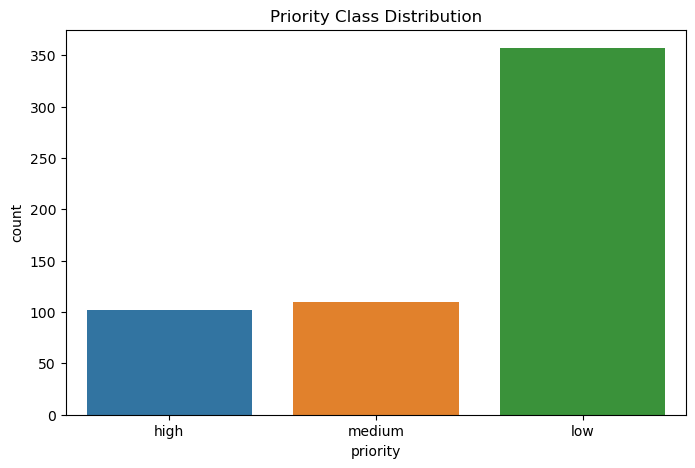

Starting grid search...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters found:
{'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.9649
F1 Score (weighted): 0.9649

Classification Report:
              precision    recall  f1-score   support

        high       1.00      1.00      1.00        31
         low       0.97      0.97      0.97       107
      medium       0.91      0.91      0.91        33

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



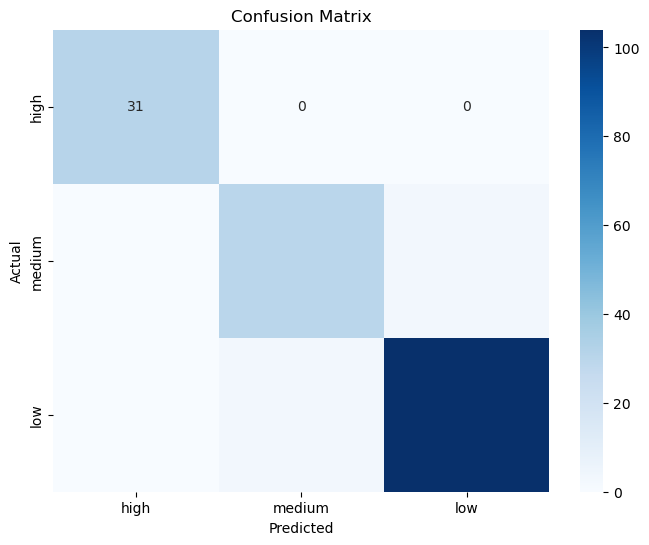

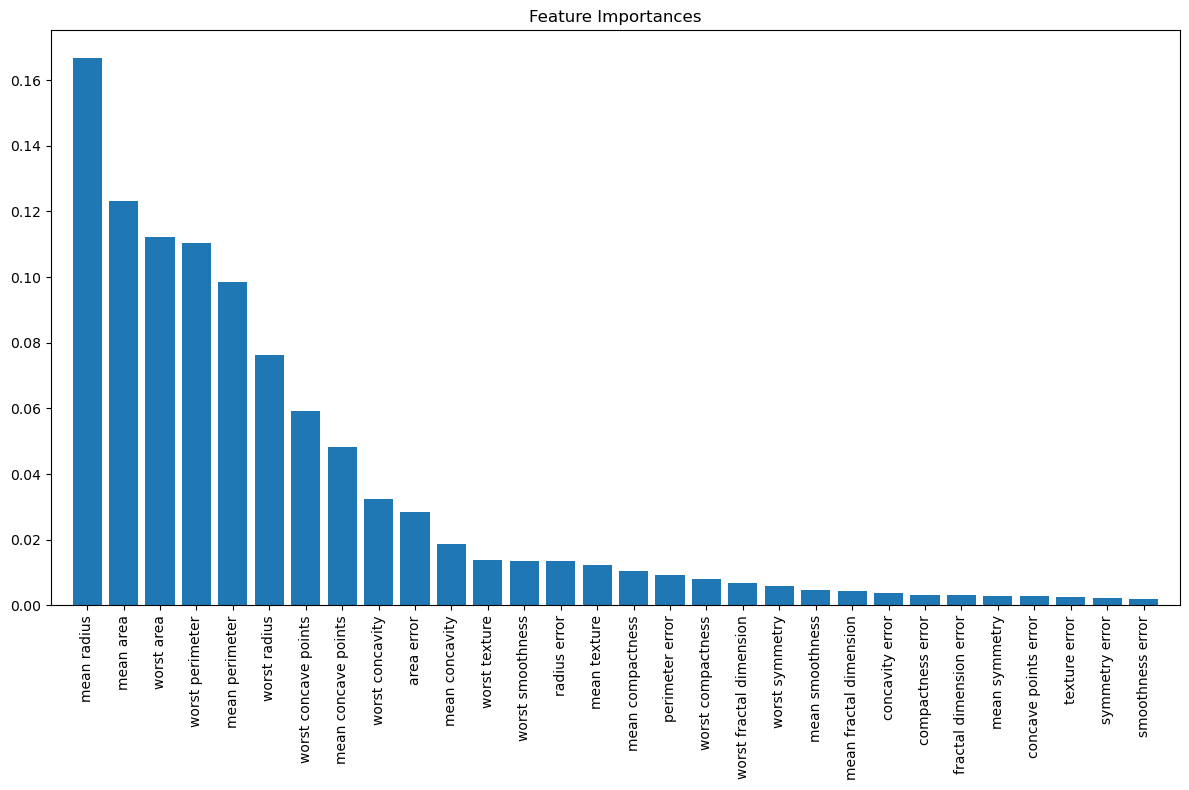


Final Results Summary:
Model: Random Forest
Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.9649122807017544
F1 Score (weighted): 0.9649122807017544
Class Distribution: {'low': 357, 'medium': 110, 'high': 102}


In [1]:
# %% [markdown]
# # Predictive Analytics for Resource Allocation
# ## Breast Cancer Diagnosis Priority Prediction

# %% [markdown]
# ## 1. Data Loading and Exploration

# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display basic info
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

# %% [markdown]
# ## 2. Data Preprocessing

# %%
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Since there are no missing values, we can proceed

# Create priority labels based on tumor characteristics
# We'll create a synthetic priority feature based on tumor characteristics
# High priority: malignant (target=0) with large mean radius (>17.5) 
# Medium priority: malignant (target=0) with smaller radius
# Low priority: benign (target=1)

# Create priority labels
conditions = [
    (df['target'] == 0) & (df['mean radius'] > 17.5),
    (df['target'] == 0) & (df['mean radius'] <= 17.5),
    (df['target'] == 1)
]
priority_labels = ['high', 'medium', 'low']
df['priority'] = np.select(conditions, priority_labels)

# Check class distribution
print("\nPriority class distribution:")
print(df['priority'].value_counts())

# Visualize the distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='priority', data=df, order=['high', 'medium', 'low'])
plt.title('Priority Class Distribution')
plt.show()

# %% [markdown]
# ### Feature Selection and Scaling

# %%
# Select relevant features - we'll use all available features for this example
X = df.drop(['target', 'priority'], axis=1)
y = df['priority']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# %% [markdown]
# ## 3. Model Training - Random Forest Classifier

# %%
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': [None, 'balanced', {'high': 2, 'medium': 1, 'low': 1}]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

print("Starting grid search...")
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_rf = grid_search.best_estimator_
print("\nBest parameters found:")
print(grid_search.best_params_)

# %% [markdown]
# ## 4. Model Evaluation

# %%
# Make predictions
y_pred = best_rf.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['high', 'medium', 'low'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['high', 'medium', 'low'],
            yticklabels=['high', 'medium', 'low'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# %% [markdown]
# ## 5. Feature Importance Analysis

# %%
# Get feature importances
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 6. Discussion of Results

# %%
# Create a results summary
results = {
    'Model': 'Random Forest',
    'Best Parameters': grid_search.best_params_,
    'Accuracy': accuracy,
    'F1 Score (weighted)': f1,
    'Class Distribution': dict(df['priority'].value_counts())
}

print("\nFinal Results Summary:")
for key, value in results.items():
    print(f"{key}: {value}")